<a href="https://colab.research.google.com/github/kalyani-m-g/animation/blob/main/spam_kalyani_m_g.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub[pandas-datasets] --quiet



In [ ]:
import kagglehub

path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
print("Downloaded data is at:", path)


Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Downloaded data is at: /kaggle/input/sms-spam-collection-dataset


In [ ]:
import os

for root, dirs, files in os.walk(path):
    for f in files:
        print(f)


spam.csv


In [ ]:
import pandas as pd
import os

file = os.path.join(path, "spam.csv")

df = pd.read_csv(file, encoding="latin-1")  # avoid UnicodeDecodeError
print(df.head())
print(df.columns)



     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
# drop empty/irrelevant columns if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# rename to standard names
df.columns = ["label", "message"]

print(df.head())
print(df["label"].value_counts())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf = TfidfVectorizer(stop_words="english")


In [ ]:
# Fit TF-IDF on the entire dataset
X_tfidf = tfidf.fit_transform(df["message"])

print("TF-IDF matrix shape:", X_tfidf.shape)


TF-IDF matrix shape: (5572, 8404)


In [ ]:
# Get feature names
features = tfidf.get_feature_names_out()

# Get average TF-IDF weight across all messages
import numpy as np
avg_tfidf = np.asarray(X_tfidf.mean(axis=0)).ravel()

# Top 20 weighted tokens
top_indices = avg_tfidf.argsort()[::-1][:20]
top_features = [(features[i], avg_tfidf[i]) for i in top_indices]

print("Top TF-IDF tokens:")
for token, score in top_features:
    print(f"{token}: {score:.4f}")


Top TF-IDF tokens:
ok: 0.0184
ll: 0.0143
just: 0.0129
come: 0.0119
gt: 0.0116
lt: 0.0116
ur: 0.0115
good: 0.0108
know: 0.0106
time: 0.0101
sorry: 0.0101
like: 0.0100
home: 0.0099
got: 0.0099
later: 0.0096
free: 0.0091
lor: 0.0090
going: 0.0089
want: 0.0087
day: 0.0086


In [ ]:
#train the model, predict on test data and show performance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9542600896860987
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       1.00      0.66      0.79       149

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



In [ ]:
# 1) Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# 2) Import models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# 3) Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

# 4) Train and evaluate
for name, model in models.items():
    print(f"\n---- {name} ----")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print(classification_report(y_test, y_pred, target_names=["ham", "spam"]))



---- Naive Bayes ----
Accuracy: 0.9722
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115


---- Logistic Regression ----
Accuracy: 0.9543
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       1.00      0.66      0.79       149

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115


---- Linear SVM ----
Accuracy: 0.9794
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.85      0.92       149

    accuracy                           0.98      1115
 

In [ ]:
from sklearn.svm import LinearSVC

svm_balanced = LinearSVC(class_weight="balanced", C=1.0, max_iter=2000)
svm_balanced.fit(X_train, y_train)

print(classification_report(y_test, svm_balanced.predict(X_test)))


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.1, 0.5, 1.0, 2.0, 5.0]}

grid = GridSearchCV(LinearSVC(class_weight="balanced", max_iter=2000),
                    param_grid, cv=5, scoring="f1_macro")

grid.fit(X_train, y_train)

print("Best C:", grid.best_params_)
best_svm = grid.best_estimator_
print(classification_report(y_test, best_svm.predict(X_test)))


Best C: {'C': 5.0}
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
import joblib

# Save
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(best_svm, "svm_spam_classifier.pkl")


['svm_spam_classifier.pkl']

In [ ]:
def classify_sms(text):
    vect = tfidf.transform([text])       # convert text → TF‑IDF
    pred = best_svm.predict(vect)[0]     # get label
    return pred

# Example use
print(classify_sms("Free entry! Win ₹1000 now!"))
print(classify_sms("Hey, are you coming today?"))


spam
ham


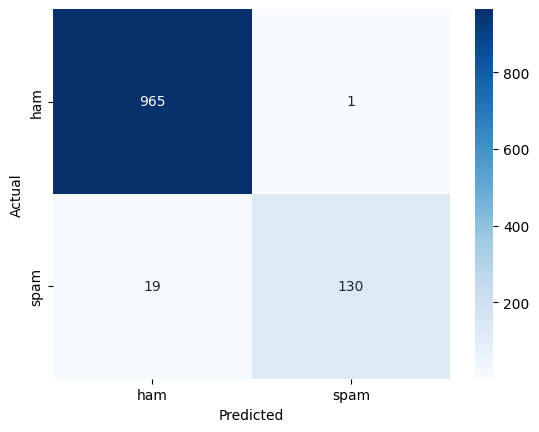

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, best_svm.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["ham","spam"], yticklabels=["ham","spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#input checking method 1 - providing an example
def classify_sms(text):
    vect = tfidf.transform([text])        # convert text -> TF‑IDF
    return best_svm.predict(vect)[0]

# Example usage:
print(classify_sms("Hey, are you free tonight?"))
print(classify_sms("Claim your prize now!!!"))



ham
spam


In [ ]:
#input checking method 2 - user enters the text to check whether it is a spam or ham
text = input("Enter an SMS message to classify: ")
vect = tfidf.transform([text])       # convert to TF‑IDF
prediction = best_svm.predict(vect)[0]
print("Prediction:", prediction)


Enter an SMS message to classify: Claim your prize now
Prediction: spam
